In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Работа с PIL

## Загрузка и свойства изображений

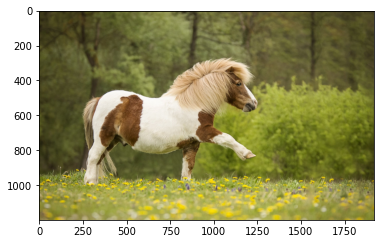

In [2]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image, ImageFilter
 
# Location of the image
img = Image.open("pony.jpg")
 
imshow(np.asarray(img))

Свойства изображения

In [3]:
# size of the image
print(img.size)
 
# format of the image
print(img.format)

(1920, 1200)
JPEG


| Тип | Описание |
| --- | --- |
| 1 | 1-bit pixels, чёрно-белое |
| L | 8-bit pixels, Greyscale |
| P | 8-bit pixels, цветовая палитра |
| RGB | 3×8-bit pixels, цветное |
| RGBA | 4×8-bit pixels, цвета + прозрачность |


In [4]:
print(img.mode)

RGB


## Повороты изображений

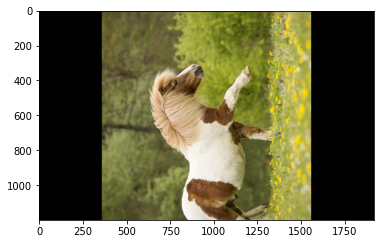

In [5]:
im1 = img.rotate(90)
imshow(np.asarray(im1))

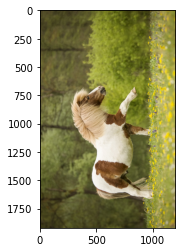

In [6]:
im1 = img.rotate(90, expand = 1)
imshow(np.asarray(im1))

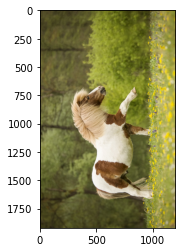

In [7]:
im1 = img.rotate(90, expand = 1)
imshow(np.asarray(im1))

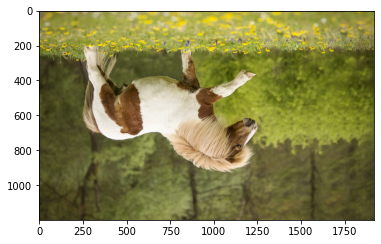

In [8]:
vertical_img = img.transpose(method=Image.FLIP_TOP_BOTTOM)
imshow(np.asarray(vertical_img))

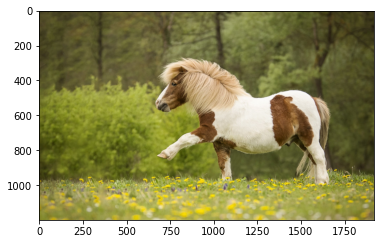

In [9]:
horizontal_img = img.transpose(method=Image.FLIP_LEFT_RIGHT)
imshow(np.asarray(horizontal_img))

## Соединение изображений

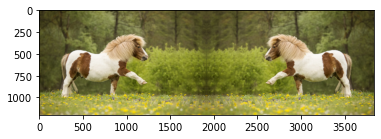

In [10]:
new_im = Image.new('RGB', (img.size[0]+horizontal_img.size[0], horizontal_img.size[1]), (250,250,250))
new_im.paste(img, (0,0))
new_im.paste(horizontal_img, (img.size[0],0))
imshow(np.asarray(new_im))

## Вырезка

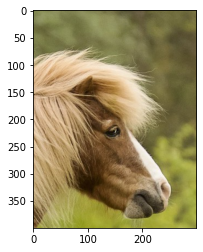

In [11]:
im1 = img.crop((1000, 200, 1300, 600))
imshow(np.asarray(im1))

## Блюринг 

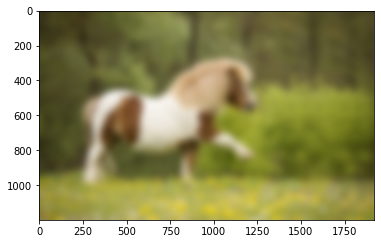

In [12]:
im1 = img.filter(ImageFilter.GaussianBlur(20))
imshow(np.asarray(im1))

## Рисование методами PIL

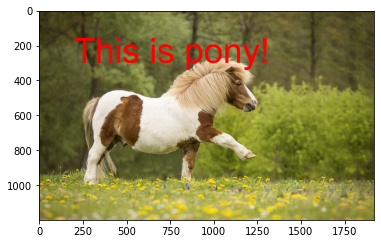

In [13]:
from PIL import ImageFont, ImageDraw

draw = ImageDraw.Draw(img)
font = ImageFont.truetype("arial.ttf", 200)

text = "This is pony!"
draw.text((200, 120), text, font = font, fill ="red", align ="right")
imshow(np.asarray(img))

## Улучшение изображения

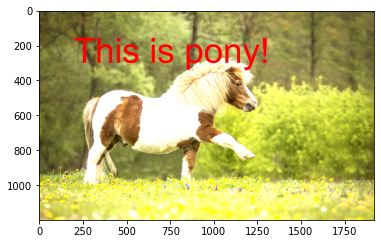

In [14]:
from PIL import ImageEnhance
im3 = ImageEnhance.Brightness(img)

imshow(np.asarray(im3.enhance(1.5)))

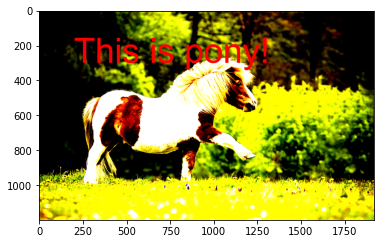

In [15]:
im3 = ImageEnhance.Contrast(img)

imshow(np.asarray(im3.enhance(5.0)))

## Изображение, как матрица, или работаем с NumPy

In [16]:
img = np.asarray(img)

In [17]:
print('# of dims: ',img.ndim)     # Количесвто измерений
print('Img shape: ',img.shape)    # Форма
print('Dtype: ',img.dtype)
print(img[20, 20])                # значение [R, G, B] в конкретном пикселе
print(img[:, :, 2].min())         # минимальное значение пикселя в канале B

# of dims:  3
Img shape:  (1200, 1920, 3)
Dtype:  uint8
[62 56 24]
0


In [18]:
#обратная конвертация
pil_img = Image.fromarray(img)

## Работа с цветами

### Негатив 

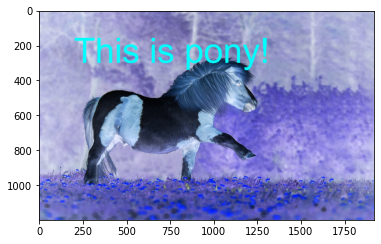

In [19]:
import matplotlib.pyplot  as plt

img_neg = 255 - img
imshow(img_neg)


### Посмотрим на каналы! 

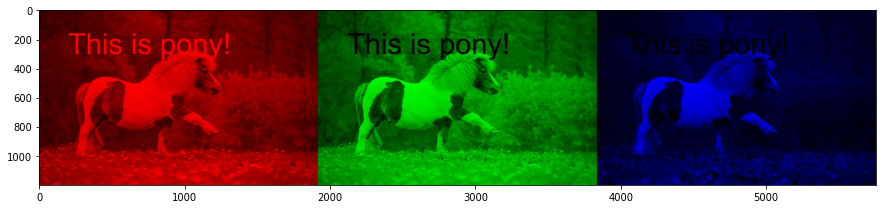

In [20]:
img_R, img_G, img_B = img.copy(), img.copy(), img.copy()
img_R[:, :, (1, 2)] = 0
img_G[:, :, (0, 2)] = 0
img_B[:, :, (0, 1)] = 0
img_rgb = np.concatenate((img_R,img_G,img_B), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)

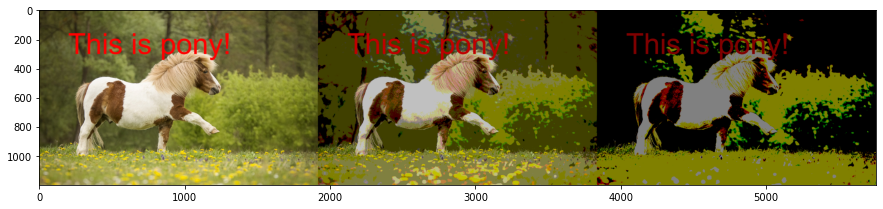

In [21]:
img_0 = (img // 64) * 64
img_1 = (img // 128) * 128
img_all = np.concatenate((img, img_0, img_1), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_all)

### Трансформации

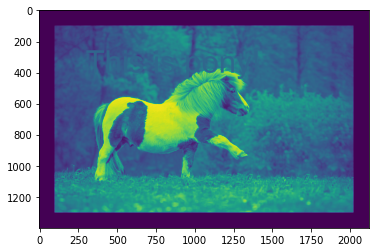

In [22]:
img_grey = img.sum(2) / (255*3)
img0 = img_grey.copy()
img0 = np.pad(img0, ((100, 100),(100,100)), mode='constant')
plt.imshow(img0)

Text(0.5, 1.0, 'Cropped')

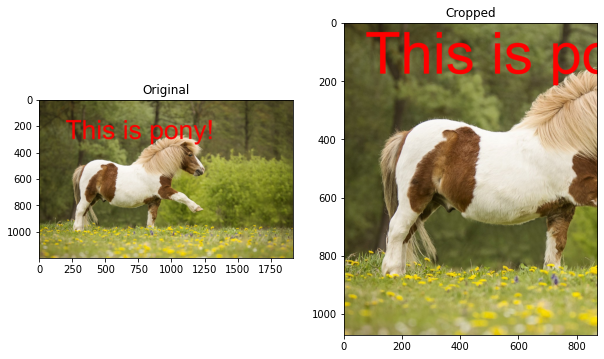

In [23]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
img0 = img[128:1280, 128:1000, :]
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title('Cropped')

Text(0.5, 1.0, 'Trimmed')

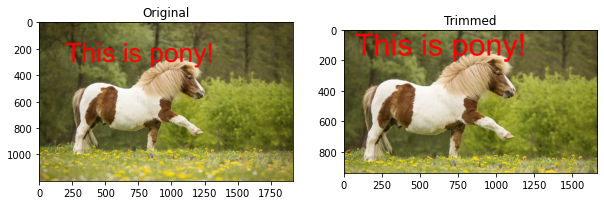

In [24]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
img0 = img[128:-128, 128:-128, :]
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title('Trimmed')

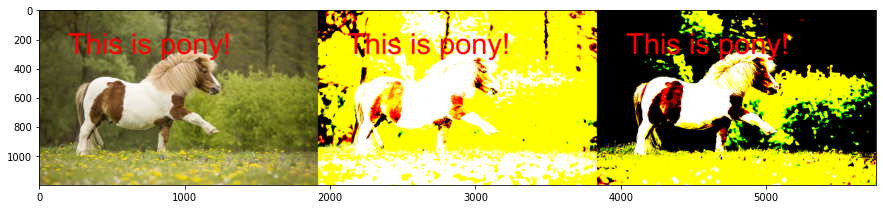

In [25]:
#бинаризация
img_64 = (img > 64) * 255
img_128 = (img > 128) * 255
fig = plt.figure(figsize=(15, 15))
img_all = np.concatenate((img, img_64, img_128), axis=1)
plt.imshow(img_all)

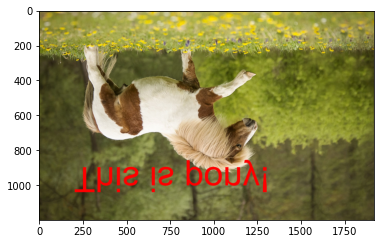

In [26]:
img0 = img.copy()
for i in range(img0.shape[0] // 2):
    c = img0[i, :, :].copy()
    img0[i, :, :] = img0[img0.shape[0] - i - 1, :, :]
    img0[img0.shape[0] - i - 1, :, :] = c
plt.imshow(img0)

### Наложение маски 

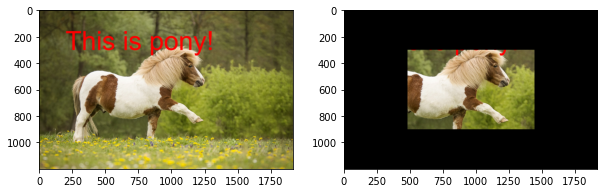

In [27]:
ones = np.ones((img.shape[0] // 2, img.shape[1] // 2, 3))
zeros = np.zeros(((img.shape[0] // 4, img.shape[1] // 4, 3)))
zeros_mid = np.zeros(((img.shape[0] // 2, img.shape[1] // 4, 3)))
up = np.concatenate((zeros, zeros, zeros, zeros), axis=1)
middle = np.concatenate((zeros_mid, ones, zeros_mid), axis=1)
down = np.concatenate((zeros, zeros, zeros, zeros), axis=1)
mask = np.concatenate((up, middle, down), axis=0)
mask = mask / 255
img0 = mask * img
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1, 2, 2)
plt.imshow(img0)

### Наложение изображений

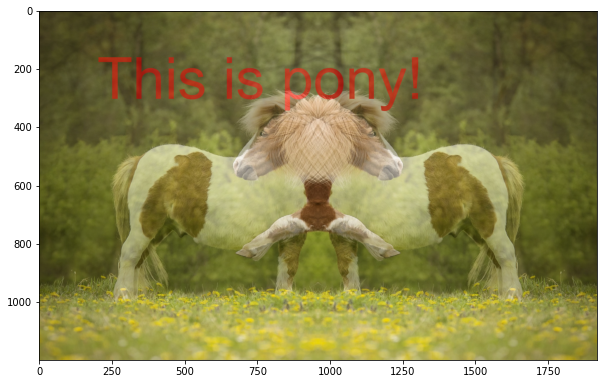

In [28]:
img0 = np.asarray(horizontal_img) 
dst = (img * 0.5 + img0 * 0.5).astype(np.uint8)   
plt.figure(figsize=(10, 10))
plt.imshow(dst)

## Интенсивность по пикселям

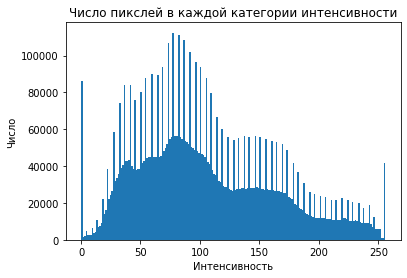

In [29]:
img_flat = img.flatten()
plt.hist(img_flat, bins=200, range=[0, 256])
plt.title("Число пикслей в каждой категории интенсивности")
plt.xlabel("Интенсивность")
plt.ylabel("Число")
plt.show()